In [56]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from tqdm import tqdm

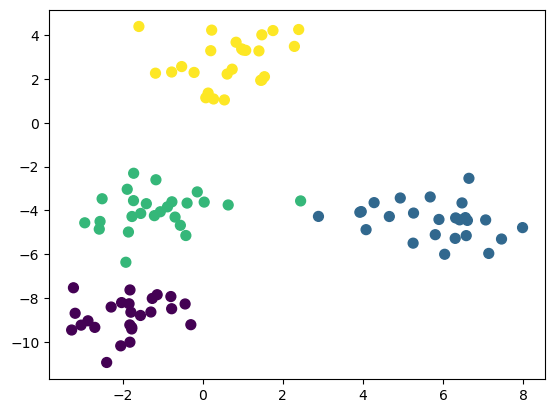

In [370]:
STD = 1.
N_SAMPLES = 100
N_CLUSTERS = 4
MAX_ITER = 1000

# Generate sample data
X, y = make_blobs(n_samples=N_SAMPLES, n_features=2, centers=N_CLUSTERS, cluster_std=STD, random_state=40)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

# Sort data based on cluster labels
y_sorted = np.argsort(y)
X_sorted = np.zeros(X.shape)
for i in range(X.shape[0]):
    X_sorted[i, :] = X[y_sorted[i], :]

X, y = X_sorted, y[y_sorted]

In [371]:
# Generate graph from sample data using k-nearest neighbors
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree', radius=STD).fit(X)
distances, indices = nbrs.kneighbors(X)

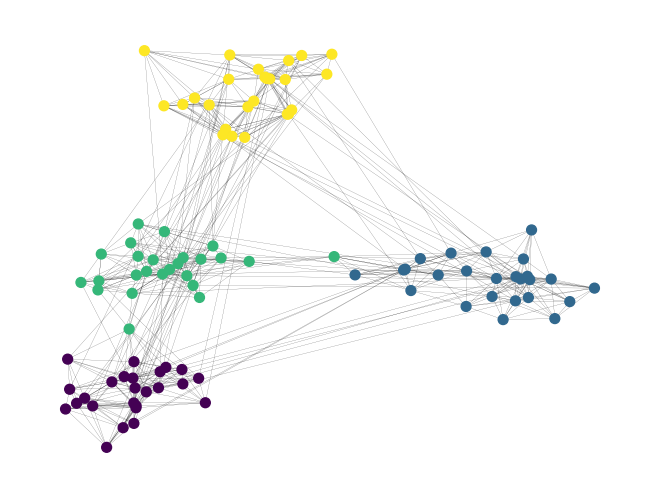

In [372]:
# Plot k-nearest neighbors graph
import networkx as nx
G = nx.Graph()
for i in range(X.shape[0]):
    for j in range(1, indices.shape[1]):
        G.add_edge(i, indices[i, j], weight=np.exp(-distances[i, j] / (2 * STD ** 2)))

# Add random edges to graph to increase connectivity
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if i != j and np.random.rand() < 0.01:
            G.add_edge(i, j, weight=np.exp(-np.linalg.norm(X[i, :] - X[j, :]) / (2 * STD ** 2)))

# Plot graph with nodes at sample data points
pos = {i: X[i, :] for i in range(X.shape[0])}
nx.draw(G, pos, node_size=50, width=0.1, node_color=[y[node] for node in G.nodes])
plt.show()

# Calculate

/var/folders/xy/2r8t088s2pn_nrnl76p9tkv00000gn/T/ipykernel_45932/1000619388.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G, nodelist=np.arange(N_SAMPLES)).toarray() + np.eye(N_SAMPLES)


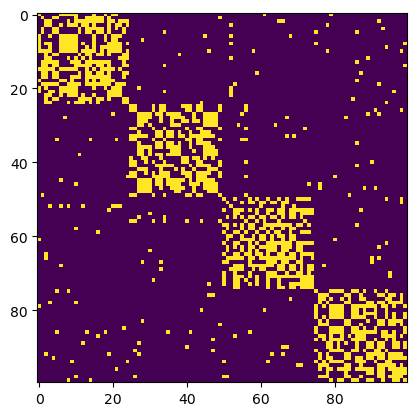

In [373]:
# Calculate adjacency matrix
W = nx.adjacency_matrix(G, nodelist=np.arange(N_SAMPLES)).toarray() + np.eye(N_SAMPLES)
W = (W > 0)

# Plot adjacency matrix
plt.imshow(W, cmap='viridis')

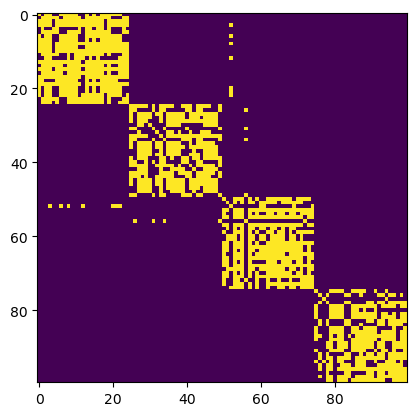

In [374]:
# Calculate trust matrix
V = np.zeros((W.shape[0], W.shape[0]))
for i in range(W.shape[0]):
    for j in range(W.shape[0]):
        V[i, j] = np.linalg.norm(X[i, :] - X[j, :]) < 2 * STD

# Plot trust matrix
plt.imshow(V, cmap='viridis')
plt.show()

In [375]:
# Initialize data to be aggregated
s = [i for i in range(W.shape[0])]

# Calculate real aggregate
cluster_sum = [sum([s[i] for i in range(W.shape[0]) if y[i] == j]) for j in range(N_CLUSTERS)]
real_psi = [cluster_sum[y[i]] for i in range(W.shape[0])]

In [380]:
def gaussian(x, mu, sigma):
    return np.exp(-np.linalg.norm(x - mu) / (2 * sigma ** 2)) * (np.linalg.norm(x - mu) < 2 * sigma)
    # return np.linalg.norm(x - mu) < 2 * sigma

  7%|▋         | 73/1000 [00:00<00:09, 96.77it/s] 


Phi converged after 73 iterations


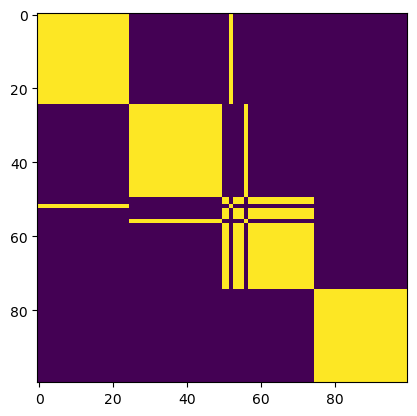

In [383]:
# Initialize contribution matrix
omega = X.copy()
new_omega = X.copy()
phi = np.ones((W.shape[0],))

eps = 0.1
for iter in tqdm(range(1000)):

    # Calculate new stationary distribution

    for i in range(W.shape[0]):
        # Calculate sum of W_ij * phi_j
        sum_omega = omega[i, :].copy()
        sum_W = 1.
        for j in G.neighbors(i):
            W_ij = gaussian(omega[i, :], omega[j, :], STD)

            sum_omega += W_ij * omega[j, :]
            sum_W += W_ij
        new_omega[i, :] = sum_omega / sum_W

    if np.linalg.norm(new_omega - omega) < 1e-6:
        print('Phi converged after {} iterations'.format(iter))
        break
    else:
        omega = new_omega.copy()


# Calculate trust matrix
V = np.zeros((W.shape[0], W.shape[0]))
for i in range(W.shape[0]):
    for j in range(W.shape[0]):
        V[i, j] = gaussian(omega[i, :], omega[j, :], STD)

# Plot trust matrix
plt.imshow(V, cmap='viridis')
plt.show()

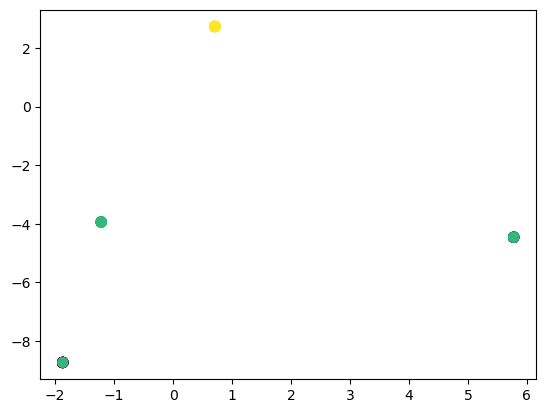

In [382]:
plt.scatter(omega[:, 0], omega[:, 1], c=y, s=50, cmap='viridis')
plt.show()

In [107]:
np.sign(-0.5)

-1.0

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])